In [211]:
import pandas as pd
import matplotlib.pyplot as plt

In [212]:
df = pd.read_parquet('resources/extended_dataset.parquet').set_index('Inspection ID')
df.head(2)

,DBA Name,AKA Name,License #,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,Results,...,Re-inspection,Community,Neighborhood,Ward,Precinct,Violation IDs,Nb Violations,Nb Violations of high severity,Nb Violations of medium severity,Nb Violations of low severity
Inspection ID,,,,,,,,,,,,,,,,,,,,,
2320519,SALAM RESTAURANT,SALAM RESTAURANT,2002822,Restaurant,High,4634-4636 N KEDZIE AVE,60625,2019-10-25,Complaint,Pass,...,True,ALBANY PARK,"NORTH PARK,ALBANY PARK",33,27,[None],0,0,0,0
2320509,TAQUERIA EL DORADO,TAQUERIA EL DORADO,2694960,Restaurant,High,2114 W LAWRENCE AVE,60625,2019-10-25,License,Fail,...,True,LINCOLN SQUARE,LINCOLN SQUARE,47,38,"[3, 5, 25, 50, 53, 53, 56, 58]",8,2,1,5


In [213]:
def remove_special_chars(string):
    return ''.join(e for e in string if e.isalnum()).upper()

def standardize_names(string):
    if 'MCDONALDS' in string:
        return 'MCDONALDS'
    elif 'SUBWAY' in string:
        return 'SUBWAY'
    elif 'POTBELLYSANDWICH' in string:
        return 'POTBELLYSANDWICH'
    elif 'POPEYES' in string:
        return 'POPEYES'
    elif 'DUNKINDONUTS' in string:
        return 'DUNKINDONUTS'
    elif 'BURGERKING' in string:
        return 'BURGERKING'
    elif 'WENDYS' in string:
        return 'WENDYS'
    elif 'STARBUCKS' in string:
        return 'STARBUCKS'
    elif 'PIZZAHUT' in string:
        return 'PIZZAHUT'
    elif 'KFC' in string or 'KENTUCKYFRIEDCHICKEN' in string:
        return 'KFC'
    elif 'HAROLDSCHICKEN' in string:
        return 'HAROLDSCHICKEN'
    elif '7ELEVEN' in string:
        return '7ELEVEN'
    elif 'JJFISH' in string:
        return 'JJFISH'
    return string

In [214]:
df.dropna(subset=['AKA Name'])
df['AKA Name'] = df['AKA Name'].map(lambda x: standardize_names(remove_special_chars(x)) if x is not None else None)

In [215]:
count_by_aka = df[['DBA Name', 'AKA Name']].groupby('AKA Name').count().rename(columns={'DBA Name' : 'Nb Inspections'}).sort_values('Nb Inspections', ascending=False)
count_by_aka.head(10)

,Nb Inspections
AKA Name,
SUBWAY,4107
DUNKINDONUTS,2357
MCDONALDS,2080
STARBUCKS,1427
7ELEVEN,1396
BURGERKING,751
POPEYES,678
POTBELLYSANDWICH,596
HAROLDSCHICKEN,576


In [216]:
aka_names_with_low_count = count_by_aka[count_by_aka['Nb Inspections'] <= 3].index.values
df_simplified = df[df['AKA Name'].map(lambda x: x not in aka_names_with_low_count)]
count_by_aka = df_simplified[['DBA Name', 'AKA Name']].groupby('AKA Name').count().rename(columns={'DBA Name' : 'Nb Inspections'}).sort_values('Nb Inspections', ascending=False)

In [217]:
count_by_aka.sort_values('Nb Inspections').head()

,Nb Inspections
AKA Name,
LAPANEHALAHPIZZA,4
WATTSMART,4
BOYAFOODTRADING,4
WATERFRONTTERRACEINC,4
REMIFOODMART,4


([], <a list of 0 Text xticklabel objects>)

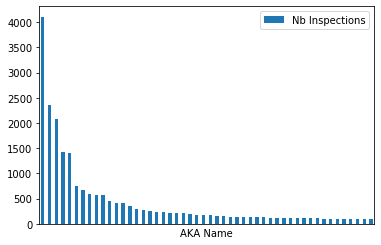

In [219]:
count_by_aka.head(50).plot.bar()
plt.xticks([])

In [220]:
nb_locations_by_aka_dict = dict()
for name in df['AKA Name'].unique():
    nb_uniques = len(df[df['AKA Name'] == name].groupby('Address'))
    nb_locations_by_aka_dict[name] = nb_uniques

In [221]:
nb_locations_by_aka = pd.DataFrame(nb_locations_by_aka_dict.items(), columns=['AKA Name', 'Nb Addresses']).set_index('AKA Name')
nb_locations_by_aka.head()

,Nb Addresses
AKA Name,
SALAMRESTAURANT,3
TAQUERIAELDORADO,3
DANTESPIZZA,1
LAOPENGYOU,1
ARBOR,1


In [222]:
df_joined = count_by_aka.join(nb_locations_by_aka)
df_joined['Mean Nb Inspections'] = df_joined['Nb Inspections'] / df_joined['Nb Addresses']
df_joined.head(10)

,Nb Inspections,Nb Addresses,Mean Nb Inspections
AKA Name,,,
SUBWAY,4107,309,13.291262
DUNKINDONUTS,2357,245,9.620408
MCDONALDS,2080,126,16.507937
STARBUCKS,1427,195,7.317949
7ELEVEN,1396,137,10.189781
BURGERKING,751,62,12.112903
POPEYES,678,46,14.739130
POTBELLYSANDWICH,596,50,11.920000
HAROLDSCHICKEN,576,58,9.931034


In [223]:
df_joined.sort_values('Mean Nb Inspections', ascending=False).head(10)

,Nb Inspections,Nb Addresses,Mean Nb Inspections
AKA Name,,,
LABOMBARESTAURANT,54,1,54.0
LAMEXICANATAMALECART,51,1,51.0
JEWELFOODSTORE3345,49,1,49.0
IYANZE,44,1,44.0
ALLISCHICKENSHOP,43,1,43.0
JEWELFOODSTORE3030,41,1,41.0
ONESTOPFOODLIQUORSTORE,40,1,40.0
STRESTCOUNTRYKITCHEN,40,1,40.0
MORRISONSRESTAURANT,38,1,38.0


([], <a list of 0 Text xticklabel objects>)

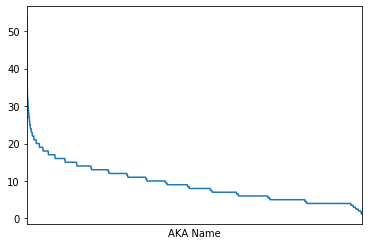

In [224]:
df_joined['Mean Nb Inspections'].sort_values(ascending=False).plot()
plt.xticks([])